### Junaid Hossain
#### ID - 222008812
#### colab link : https://colab.research.google.com/drive/1p7GAHjRMXR7ziqFlHVjaTcjxDiC25MKr?usp=sharing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# df = pd.read_csv('Advertising Budget and Sales.csv')
# df = pd.read_csv('Salary.csv')
df = pd.read_csv('song_data.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [7]:
df.shape

(18835, 15)

In [8]:
# X = df.drop(['Unnamed: 0','Sales ($)'],axis=1)
# y = df['Sales ($)']

# X = df.drop(['PhD'],axis=1)
# y = df['PhD']

X = df.drop(['audio_valence','song_name'],axis=1)
y = df['audio_valence']

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:

mlp = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32, 16),
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size=32,
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42
)
mlp.fit(X_train_scaled, y_train)

,loss,'squared_error'
,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.001
,batch_size,32
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True


In [11]:
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(train_mse)
print(test_mse)
print(train_r2)
print(test_r2)

0.015274689005507134
0.03804918919608346
0.74433468703279
0.3682418458737259


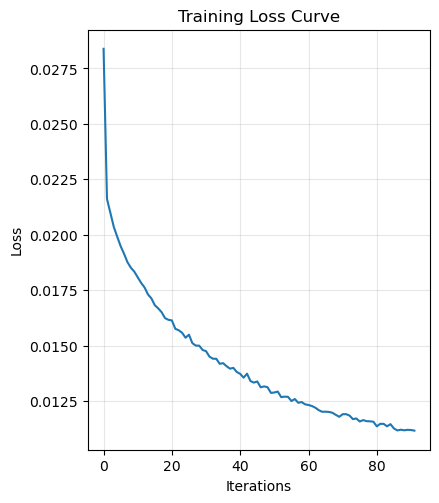

In [13]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 3)
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True, alpha=0.3)

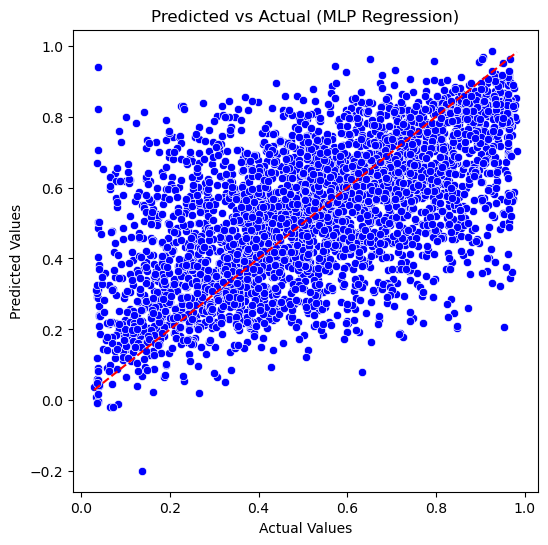

In [14]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_test_pred, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual (MLP Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()